### EDA   
[step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read_csv() 함수로 df 생성
df_auto = pd.read_csv('c:/py_data/auto-mpg.csv', header=None)
# 열 이름 지정
df_auto.columns = ['연비(mpg)','실린더 수','배기량','출력','차중',
                    '가속능력','출시년도','제조국','모델명']

[step 2] 데이터 탐색

In [91]:
# 데이터 자료형 확인
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연비(mpg)  398 non-null    float64
 1   실린더 수    398 non-null    int64  
 2   배기량      398 non-null    float64
 3   출력       398 non-null    object 
 4   차중       398 non-null    float64
 5   가속능력     398 non-null    float64
 6   출시년도     398 non-null    int64  
 7   제조국      398 non-null    int64  
 8   모델명      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [92]:
# 데이터 통계 요약정보 확인
df_auto.describe()

,연비(mpg),실린더 수,배기량,차중,가속능력,출시년도,제조국
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [93]:
# 출력 열의 자료형 변경(문자열 -> 숫자)
df_auto['출력'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [94]:
df_auto['출력'].replace('?',np.nan, inplace=True)    # '?'를 np.nan으로 변환
df_auto.dropna(subset=['출력'],axis=0, inplace=True) # 누락데이터 행 삭제
df_auto['출력'] = df_auto['출력'].astype('float')     # 문자열을 실수형으로 변환

In [95]:
# NaN값 유무 확인
df_auto.isnull().sum()

연비(mpg)    0
실린더 수      0
배기량        0
출력         0
차중         0
가속능력       0
출시년도       0
제조국        0
모델명        0
dtype: int64

[step 3] 속성(feature 또는 variable) 선택

In [96]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df_auto[['연비(mpg)','실린더 수','출력','차중']]
ndf.head()

,연비(mpg),실린더 수,출력,차중
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


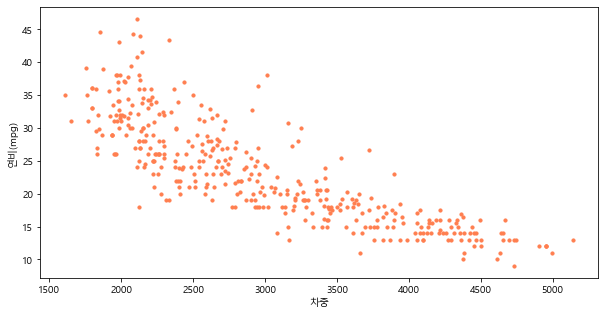

In [97]:
# matplotlib차트 한글 표현을 위한 폰트 변경
import matplotlib.font_manager as fm    # 파일 경로 지시
fl = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family=fl)

### 종속변수 Y인 '연비(mpg)'와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='차중', y='연비(mpg)',
        c='coral', s=10, figsize=(10, 5))
plt.show()

In [98]:
# 차의 중량이 늘어날 수록 연비가 낮아짐을 알 수 있다.

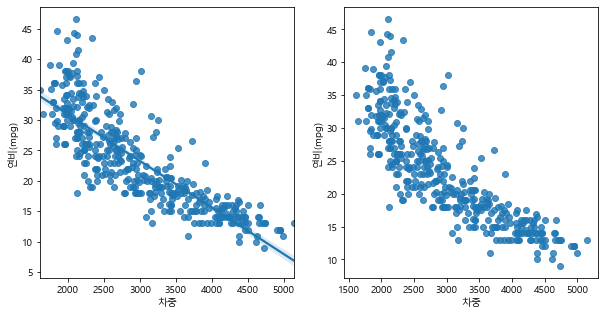

In [99]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='차중', y='연비(mpg)', data=ndf, ax=ax1)  # 회귀선 표시
sns.regplot(x='차중', y='연비(mpg)', data=ndf, ax=ax2,
           fit_reg=False)  # 회귀선 미표시
plt.show()

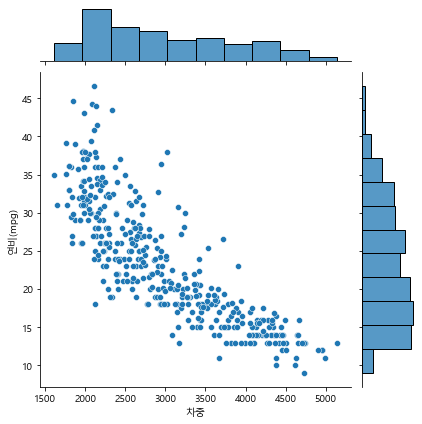

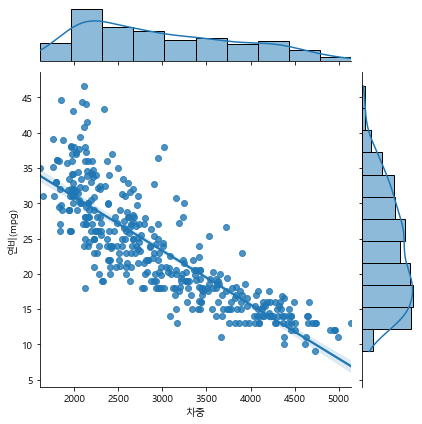

In [100]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='차중', y='연비(mpg)', data=ndf)  # 회귀선 없음
sns.jointplot(x='차중', y='연비(mpg)', kind='reg', data=ndf)  # 회귀선 표시
plt.show()

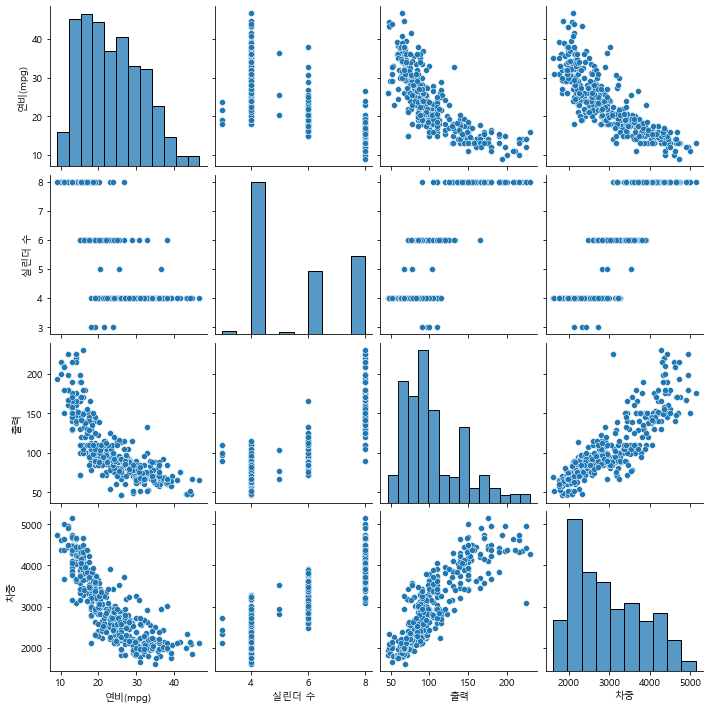

In [101]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()

### 단순회귀분석   
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [102]:
# 속성(변수) 선택     
X=ndf[['차중']] # 독립 변수 X      # 왜 list로 ..!?!?!?
y=ndf['연비(mpg)']  # 종속 변수 y

In [103]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 10)
print('train data 개수: ', len(X_train))
print('test data 개수:', len(X_test))

train data 개수:  274
test data 개수: 118


Step 5: 단순회귀분석 모형 - sklearn 사용

In [105]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.6822458558299325

In [107]:
# 회귀식의 기울기(W)
print('기울기 a:', lr.coef_)

기울기 a: [-0.00775343]


In [108]:
# 회귀식의 y절편
print('y절편 b:', lr.intercept_)

y절편 b: 46.710366257280086


In [109]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X_test)
y_hat

array([25.62103211, 27.13295129, 20.19362994, 33.06432652, 15.07636504,
       19.99979415, 16.70458569,  6.85772747, 28.6061033 , 29.04804891,
       20.8449182 , 20.10058876, 25.62103211, 26.66774539, 13.57219929,
       18.23976516, 24.19440068, 29.49774795, 12.78134926, 12.95192476,
       13.9908846 , 31.28103723, 22.37234424, 15.27020083, 18.0769431 ,
       10.78871732, 17.39464111, 30.15678964, 21.39541185, 26.17927919,
       21.64352166, 21.82185059, 26.35760812, 23.35703006, 22.90733103,
       30.62199554, 31.31980439, 21.73656284, 17.42565484, 25.94667624,
       21.81409716, 23.57412615, 30.27309111, 21.66678196, 22.28705649,
       10.60263496, 15.06085818, 32.17268187, 22.24828933, 29.7303509 ,
       29.14884352, 11.82767717, 23.28724918, 13.70400763, 17.54970974,
       24.72938747, 24.11686637, 29.73810433, 30.24207739, 25.62103211,
       31.04843428, 27.00114295, 19.37951962, 23.87650999, 26.04747085,
       32.9635319 ,  7.9664682 , 23.83774283, 21.35664469, 14.69

In [110]:
df_y = pd.DataFrame({'y_hat':y_hat, 'y_test':y_test})
df_y

,y_hat,y_test
243,25.621032,21.5
371,27.132951,29.0
300,20.193630,23.9
345,33.064327,35.1
265,15.076365,17.5
...,...,...
384,31.474873,32.0
20,25.993197,25.0
189,15.991270,15.5
60,28.040103,20.0


In [113]:
df_y['차이'] = df_y['y_hat'] - df_y['y_test']
df_y

,y_hat,y_test,차이
243,25.621032,21.5,4.121032
371,27.132951,29.0,-1.867049
300,20.193630,23.9,-3.706370
345,33.064327,35.1,-2.035673
265,15.076365,17.5,-2.423635
...,...,...,...
384,31.474873,32.0,-0.525127
20,25.993197,25.0,0.993197
189,15.991270,15.5,0.491270
60,28.040103,20.0,8.040103


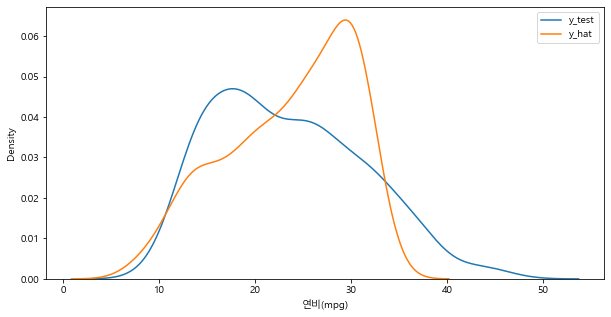

In [114]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

### 비선형 회귀분석   
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [115]:
# 속성(변수) 선택
# 속성(변수) 선택     
X=ndf[['차중']] # 독립 변수 X      # 왜 list로 ..!?!?!?
y=ndf['연비(mpg)']  # 종속 변수 y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 10)
print('train data 개수: ', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수:  (274, 1)
test data 개수: (118, 1)


In [116]:
# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [117]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

LinearRegression()

In [118]:
X_test_poly = poly.fit_transform(X_test)  # X_test 데이터를 2차항으로 변형

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.7087009262975685


In [119]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = pr.predict(X_test_poly)
y_hat

array([24.66536039, 26.54410041, 18.98929297, 35.16662957, 15.16790147,
       18.81747781, 16.22268456, 12.13891111, 28.49938194, 29.10996986,
       19.58220208, 18.90655573, 24.66536039, 25.95221677, 14.32710701,
       17.35492396, 23.01149434, 29.74264161, 13.93651453, 14.01775932,
       14.54825345, 32.36444573, 21.06709395, 15.28558567, 17.22850081,
       13.10967497, 16.7150811 , 30.69055618, 20.10211401, 25.34395031,
       20.3420599 , 20.51667773, 25.56444733, 22.09451299, 21.61847493,
       31.37450508, 32.42344474, 20.43293981, 16.73784551, 25.05905632,
       20.50904814, 22.32842989, 30.86039258, 20.36473385, 20.98069295,
       13.04395831, 15.1585788 , 33.74299018, 20.94155617, 30.07438659,
       29.25077822, 13.5126894 , 22.01989315, 14.3956548 , 16.82944872,
       23.61816563, 22.92491785, 30.0854976 , 30.81502786, 24.66536039,
       32.01224181, 26.37515376, 18.28199056, 22.65869766, 25.1821336 ,
       35.0034357 , 12.32397221, 22.6160658 , 20.06493787, 14.94

In [120]:
df_y_test = pd.DataFrame({'y_hat':y_hat,'y':y_test})
df_y['차이'] = df_y['y_hat'] - df_y['y_test']
df_y

,y_hat,y_test,차이
243,25.621032,21.5,4.121032
371,27.132951,29.0,-1.867049
300,20.193630,23.9,-3.706370
345,33.064327,35.1,-2.035673
265,15.076365,17.5,-2.423635
...,...,...,...
384,31.474873,32.0,-0.525127
20,25.993197,25.0,0.993197
189,15.991270,15.5,0.491270
60,28.040103,20.0,8.040103


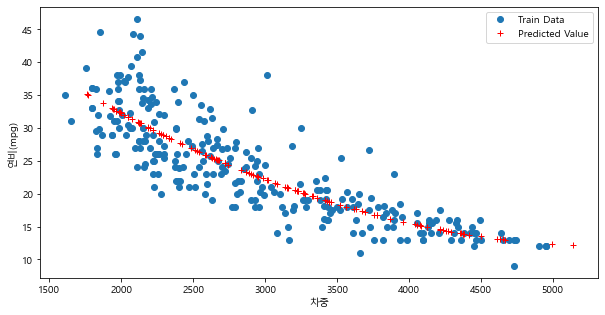

In [121]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('차중')
plt.ylabel('연비(mpg)')
plt.show()
plt.close()

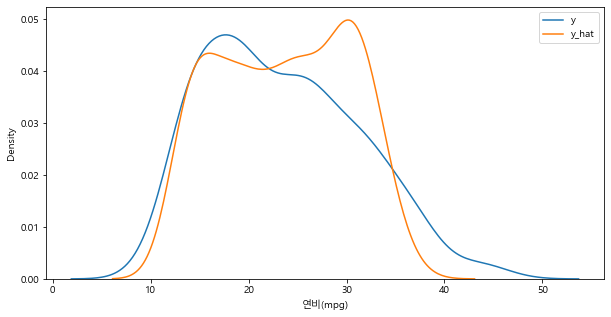

In [122]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

### 다중회귀 분석   
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [123]:
# 속성(변수) 선택
X=ndf[['차중','실린더 수','출력']] # 독립 변수 X1,X2,X3      # 왜 list로 ..!?!?!?
y=ndf['연비(mpg)']  # 종속 변수 y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 10)
print('train data 개수: ', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수:  (274, 3)
test data 개수: (118, 3)


In [124]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.6939048496695586

In [125]:
# 회귀식의 기울기
print('X 변수의 개수 a: ', lr.coef_)

X 변수의 개수 a:  [-0.00522268 -0.60691288 -0.03714088]


In [126]:
# 회귀식의 y절편
print('상수항 b', lr.intercept_)

상수항 b 46.414351269634416


In [127]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X_test)

df_y = pd.DataFrame({'y_hat':y_hat, 'y_test':y_test})

df_y_test = pd.DataFrame({'y_hat':y_hat,'y':y_test})
df_y['차이'] = df_y['y_hat'] - df_y['y_test']
df_y

,y_hat,y_test,차이
243,26.302431,21.5,4.802431
371,27.679604,29.0,-1.320396
300,20.354810,23.9,-3.545190
345,32.566333,35.1,-2.533667
265,15.050798,17.5,-2.449202
...,...,...,...
384,31.235698,32.0,-0.764302
20,26.800447,25.0,1.800447
189,16.409892,15.5,0.909892
60,28.067812,20.0,8.067812


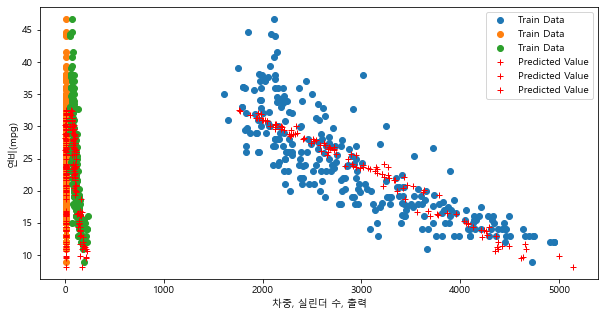

In [128]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('차중, 실린더 수, 출력')
plt.ylabel('연비(mpg)')
plt.show()
plt.close()

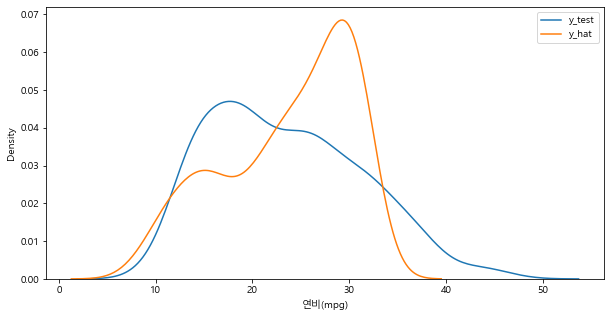

In [129]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()